<a href="https://colab.research.google.com/github/Aadityapritam/Digit_recognition-Deep-Learning-/blob/master/Digit_recogniser.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop
import numpy as np

In [0]:
(mnist_train_images, mnist_train_labels), (mnist_test_images, mnist_test_labels) = mnist.load_data()

In [57]:
train_images= mnist_train_images.reshape(60000, 784)
test_images= mnist_test_images.reshape(10000, 784)

train_images= train_images.astype('float32')
test_images= test_images.astype('float32')

train_images= train_images/255
test_images= test_images/255 

print('train_images shape:' ,train_images.shape)
print(train_images.shape[0], 'train samples')
print(test_images.shape[0], 'test samples')

train_images shape: (60000, 784)
60000 train samples
10000 test samples


In [0]:
train_labels= keras.utils.to_categorical(mnist_train_labels, 10)
test_labels= keras.utils.to_categorical(mnist_test_labels, 10)

[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


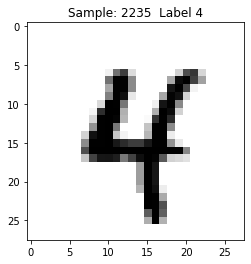

In [59]:
import matplotlib.pyplot as plt

def display_sample(num):
  print(train_labels[num])

  label= train_labels[num].argmax(axis=0)
  image= train_images[num].reshape([28, 28])
  plt.title('Sample: %d  Label %d' % (num, label))
  plt.imshow(image, cmap=plt.get_cmap('gray_r'))
  plt.show()

display_sample(2235)

In [0]:
model= Sequential()
model.add(Dense(512, activation='relu' , input_shape=(784,)))
model.add(Dense(10, activation='softmax'))

In [66]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_17 (Dense)             (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(loss='categorical_crossentropy', 
              optimizer=RMSprop(),
              metrics=['accuracy'])

In [79]:
model.fit(train_images, train_labels,
                   batch_size=80,
                   epochs=10,
                   verbose=2,
                   validation_data=(test_images, test_labels))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 6s - loss: 0.0096 - acc: 0.9972 - val_loss: 0.0788 - val_acc: 0.9811
Epoch 2/10
 - 5s - loss: 0.0077 - acc: 0.9978 - val_loss: 0.0865 - val_acc: 0.9800
Epoch 3/10
 - 5s - loss: 0.0060 - acc: 0.9981 - val_loss: 0.0870 - val_acc: 0.9827
Epoch 4/10
 - 5s - loss: 0.0051 - acc: 0.9985 - val_loss: 0.0862 - val_acc: 0.9823
Epoch 5/10
 - 5s - loss: 0.0038 - acc: 0.9988 - val_loss: 0.0962 - val_acc: 0.9803
Epoch 6/10
 - 6s - loss: 0.0032 - acc: 0.9991 - val_loss: 0.1086 - val_acc: 0.9793
Epoch 7/10
 - 5s - loss: 0.0026 - acc: 0.9994 - val_loss: 0.0988 - val_acc: 0.9809
Epoch 8/10
 - 5s - loss: 0.0023 - acc: 0.9994 - val_loss: 0.1055 - val_acc: 0.9807
Epoch 9/10
 - 6s - loss: 0.0021 - acc: 0.9995 - val_loss: 0.1007 - val_acc: 0.9809
Epoch 10/10
 - 5s - loss: 0.0016 - acc: 0.9996 - val_loss: 0.1163 - val_acc: 0.9789


In [80]:
score= model.evaluate(test_images, test_labels , verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.11626613392173249
Test accuracy: 0.9789


In [81]:
# model_json= model.to_json()
# with open("model.json", "w") as json_file:
#   json_file.write(model_json)

model.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk


In [0]:
# for x in range(1000):
#   test_image= test_images[x,:].reshape(1,784)
#   predicted_cat= model.predict(test_image).argmax()
#   label= test_labels[x].argmax()
#   if(predicted_cat!=label):
#     plt.title('prediction: %d Label: %d' %(predicted_cat, label))
#     plt.imshow(test_image.reshape([28,28]), cmap=plt.get_cmap('gray_r'))
#     plt.show()

In [84]:
# predict on the first 5 test images

predictions= model.predict(test_images[6:8])
# print(predictions)
print(np.argmax(predictions, axis=1))
print(test_labels[6:8])

[4 9]
[[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


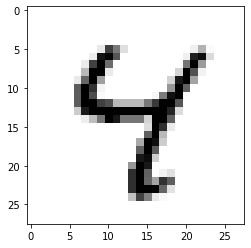

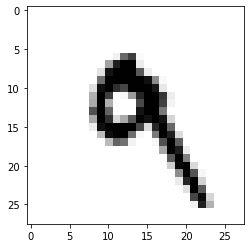

In [91]:
for i in range(6,8):
  first_image= test_images[i]
  first_image= np.array(first_image, dtype='float')
  pixels= first_image.reshape((28,28))
  plt.imshow(pixels, cmap='gray_r')
  plt.show()
